## Analyzing the Stroop Effect

by Gerrit Tombrink

Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

##### The independent variable is the condition of the word ("congruent words condition" or "incongruent words condition"). The dependent variable is the response time of each user.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

##### Null hypothesis: There is no significant time difference between the reading time of the independent variables (congruent and incongruent word condition). The reading time of the incongruent word condition is more or less the same.

$$H_0: \mu_{i} = \mu_{c} $$

##### Alternative hypothesis: There is a significant time difference between the reading time of the independent variables (congruent and incongruent word condition). The reading time of the incongruent word condition takes longer.

$$H_1: \mu_{i} \neq \mu_{c} $$


##### Because the sample size is small (n=24), the differences between both groups are almost normally distributed and we want to detect the differences between the independent variables, we use the statistical analysis of a dependent t-test (paired t-test) with a significance of $\alpha=0.95$. With this statistical test, we calculate the differences between the means of the congruent and incongruent word condition (independent variables) on the basis of the response time (dependent variable), which helps us to reject/accept the null hypothesis and to reject/accept the alternative hypothesis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import t
%matplotlib inline

# Implement and test dataset
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Perform analysis
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


##### Regarding this dataset, the calculation of mean shows that the response time of the users (dependent variable) is lower during the congruent word conditions (independent variable) than in incongruent word conditions (14.05 compared to 22.02). Furthermore, it clarifies that the standard deviation of the congruent word conditions is lower than that of the incongruent word conditions (3.56 compared to 4.80).

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

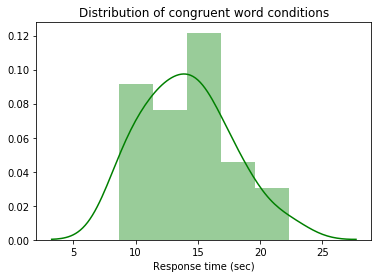

In [3]:
# Visualization of the sample data with seaborn
sns.distplot(df["Congruent"], axlabel= "Response time (sec)", color="g").set_title('Distribution of congruent word conditions');

##### The data of the congruent word conditions is almost symmetric (normal distribution) with a low right skew.

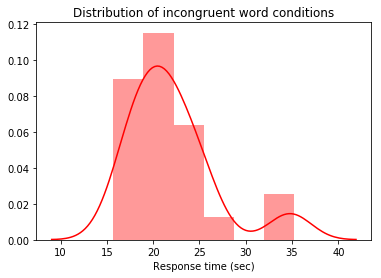

In [4]:
# Visualization of the sample data with seaborn
sns.distplot(df["Incongruent"], axlabel= "Response time (sec)", color="r").set_title('Distribution of incongruent word conditions');

##### The data of the incongruent word conditions is almost symmetric (normal distribution) with a tendency to a bimodal distribution (peak on the right side). This right peak results from the maximum values of the data (max = 35.25 sec).

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
# Size of the samples
n = df.shape[0]
print("The sample size of this data is: {}".format(n))

The sample size of this data is: 24


In [6]:
# Calculate the mean of the independent variable "Incongruent"
mean_I = df["Incongruent"].mean()
print("The mean of 'Incongruent' is: {}".format(mean_I))

The mean of 'Incongruent' is: 22.015916666666666


In [7]:
# Calculate the mean of the independent variable "Congruent"
mean_C = df["Congruent"].mean()
print("The mean of 'Congruent' is: {}".format(mean_C))

The mean of 'Congruent' is: 14.051124999999999


In [8]:
# Calculate the differences of the means
difference_mean = mean_I - mean_C
difference_mean
print("The point estimate for the difference of the means is: {}".format(difference_mean))

The point estimate for the difference of the means is: 7.964791666666667


##### Implementation of the statistical analysis of a dependent t-test (paired t-test):

In [9]:
# n = 24
# Degrees of Freedom = n – 1
dfree = n - 1 # n = size of sample (see above)

# Calculate the critical t-statistic with a 95% confidence interval
crit_t = t.ppf(0.05, dfree)
print("The critical t-statistic is: {}".format(crit_t))

The critical t-statistic is: -1.7138715277470478


In [10]:
# Calculate the t-statstic and p-value of the data
ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

##### Our t-statistic (-8.020706944109957) is greater than our critical t-statistic (-1.7138715277470478). Consequently, we have to reject the null hypothesis and accept the alternative hypothesis with a 95% confidence interval. This calculation confirms that the response time of the users is lower during the congruent word conditions, which was calculated with the mean-value of both variables before.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

##### The Stroop effect happens because reading is a much more automated cognitive activity than naming colours (see: https://en.wikipedia.org/wiki/Stroop_effect). An interesting task would be to repeat the experiment with colour-blind people. Alternatively, we can repeat the experiment with spatial pattern (called: spatial Stroop effect, see: https://en.wikipedia.org/wiki/Stroop_effect).


##### References:

https://seaborn.pydata.org/generated/seaborn.distplot.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html

http://www.statisticshowto.com/t-statistic/

http://www.statisticshowto.com/degrees-of-freedom/

https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://en.wikipedia.org/wiki/Stroop_effect